# &#x1F4DD; REPORT

# Homework &#x0031;&#xFE0F;&#x20E3; 

Homework policy: the homework is individual. Students are encouraged to discuss with fellow students to try to find the main structure of the solution for a problem, especially if they are totally stuck at the beginning of the problem. However, you should work out the details yourself and write down in your own words only what you understand yourself.

## Problem: ML Estimation of Roundtrip Delay Distribution¶


In this problem, we consider the roundtrip delay in a computer network (internet) between the computer we’re working on and another computer connected to the network. This roundtrip delay will be different, every time we send a message. As such, it can be modeled as a random variable y. For the design of network protocols and for their performance evaluation, it is important to know the distribution of this random roundtrip delay. To turn the estimation of the roundtrip delay distribution into a parameter estimation problem, we shall take a parametric distribution, parameterized by one or more parameters. Since we don’t have too much information about this variable y (except that it should be positive), we shall try several parametric distributions. In particular, we shall consider the following distributions:

$$
\text { * A Gaussian distribution: } \qquad f_G (y|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}  e^{-\frac{(y−\mu)^2}{2\sigma^2}} 
$$

$$
\text { * A Rayleigh distribution: } \qquad f_R (y|\sigma^2) = 
\begin{cases}
0 & , y < 0
\\
\frac{y}{\sigma^2}  e^{-\frac{y^2}{2\sigma^2}} & , y \geq 0
\end{cases}
$$

$$
\text { * An Erlang distribution: } \qquad f_{Em} (y|\lambda) = 
\begin{cases}
0 & , y < 0
\\
\frac{\lambda^{m+1}}{m!} y^me^{\lambda y} & , y \geq 0
\end{cases} 
\\
\text{ for different values of } m \in \{0,1,2\}.
\\
\\
\text{ Remark that for m = 0 we have an exponential density: }
\\
f_{E0}(y|\lambda) = 
\begin{cases}
0 & , y < 0
\\
\lambda e^{-\lambda y} & , y \geq 0
\end{cases}
$$

$$
\text{ * A (shifted) exponential density: } \qquad f_{exp}(y|\lambda,\alpha) = 
\begin{cases}
0 & , y < 0
\\
\lambda e^{-\lambda(y - \alpha)} & , y \geq 0
\end{cases}
$$

**&#x1F516;** **(&#x2170;)** Assume we collect n i.i.d. measurements $y1, . . . , yn$ that we can put into a vector $Y =
[y1, y2, . . . , yn]^T$ . For each of the parametric distributions $f_i(Y |\theta), i \in \{G, R, E0, E1, E2, exp\}$,
determine the Maximum Likelihood estimate ${\hat{\theta}_{ML,i}}$ of the parameter(s) $\theta$ involved.


For each distribution, the Maximum Likelihood Estimate (MLE) is found by setting up the likelihood function based on the given distribution, taking the derivative with respect to $\theta$, setting it to **zero**, and solving for $\theta$. 

A a general approach for MLE:

1. **Write down the likelihood function** $L(\theta | Y) = \prod_{i=1}^n f(y_i | \theta)$.
2. **Take the logarithm** to get the log-likelihood function, $l(\theta | Y) = \log L(\theta | Y)$, which is often easier to work with.
3. **Differentiate** $l(\theta | Y)$ with respect to $\theta$ and **set to zero** to find critical points.
4. **Solve for $\theta$** to find the MLE, $\hat{\theta}_{ML}$.


Given the specific forms for the Gaussian, Rayleigh, and Erlang distributions (including the Exponential distribution as a special case of the Erlang distribution with $m=0$ ), let's determine the Maximum Likelihood Estimates (MLE) for their parameters ( $\mu$, $\sigma^2$ for Gaussian; $\sigma^2$ for Rayleigh; $\lambda$ for Erlang/Exponential).

### Gaussian Distribution MLE

For the Gaussian distribution, the likelihood function is:

$$ L(\mu, \sigma^2 | Y) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(y_i−\mu)^2}{2\sigma^2}} $$

Taking the log-likelihood, differentiating with respect to $\mu$ and $\sigma^2$, and setting to zero, we find:

- **Mean ( $\mu$ ) MLE:**
$ \hat{\mu} = \frac{1}{n}\sum_{i=1}^n y_i $

- **Variance ( $\sigma^2$ ) MLE:**
$ \hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{\mu})^2 $

### Rayleigh Distribution MLE

For the Rayleigh distribution, the likelihood function for $y_i \geq 0$ is:

$$ L(\sigma^2 | Y) = \prod_{i=1}^n \frac{y_i}{\sigma^2} e^{-\frac{y_i^2}{2\sigma^2}} $$

Taking the log-likelihood, differentiating with respect to $\sigma^2$, and setting to zero gives:

- **Scale parameter ( $\sigma^2$ ) MLE:**
$ \hat{\sigma}^2 = \frac{1}{2n}\sum_{i=1}^n y_i^2 $

### Erlang Distribution MLE

For the Erlang distribution (including the Exponential as a special case with $m=0$), the likelihood function for $y_i \geq 0$ and $m \in \{0,1,2\}$ is:

$$ L(\lambda | Y) = \prod_{i=1}^n \frac{\lambda^{m+1}}{m!} y_i^m e^{-\lambda y_i} $$

Taking the log-likelihood, differentiating with respect to $\lambda$, and setting to zero gives the MLE for $\lambda$. For $m=0$ (Exponential distribution), the solution simplifies to:

- **Rate parameter ( $\lambda$ ) MLE for Exponential:**
$ \hat{\lambda} = \frac{n}{\sum_{i=1}^n y_i} $

For $m=1$ and $m=2$, solving for $\lambda$ involves specific steps for each $m$, often requiring iterative methods for higher $m$ values due to the nature of the likelihood equations.

### Summary

- **Gaussian MLEs:** $\hat{\mu}$ and $\hat{\sigma}^2$.
- **Rayleigh MLE:** $\hat{\sigma}^2$.
- **Exponential MLE:** $\hat{\lambda}$.
- **Erlang MLE for $m > 0$:** Requires specific calculation per $m$ value, with iterative methods possibly needed for exact $\lambda$ estimates.

For Erlang distributions with $m=1$ and $m=2$, a general expression for $\lambda$ MLE requires detailed steps that might involve more complex algebraic manipulations or numerical methods, especially as the derivative of the log-likelihood function with respect to $\lambda$ does not always lead to a simple analytical solution.

**&#x1F516;** **(&#x2171;)** Consider now also a shifted Rayleigh distribution:

$$
f_{SR}(y|\alpha, \sigma^2) = 
\begin{Bmatrix}
0 & , y < \alpha
\\
\frac{y - \alpha}{\sigma^2}  e^{-\frac{(y - \alpha)^2}{2\sigma^2}} & , \alpha \geq y
\end{Bmatrix} =
\frac{y - \alpha}{\sigma^2}  e^{-\frac{(y - \alpha)^2}{2\sigma^2}} \mathbf{1}_{[\alpha,\infty)}(y)
$$

$$
\text { for some } α ≥ 0, σ2 > 0  \text{ , and where we introduced the indicator function for a set A : }
\\
\\
\mathbf{1}_A(y) = 
\begin{cases}
0 & , y \notin A \\
1 & , y \in A
\end{cases}
$$

&#x1F516; (&#x0061;) Determine the mean of $y, m_y$, according to this shifted Rayleigh distribution, as a function of the parameters $\alpha$ and $\sigma^2$.

To solve for $\alpha$ and $\sigma^2$ for the shifted Rayleigh distribution $f_{SR}(y|\alpha, \sigma^2)$, we first define the log-likelihood function based on the given probability density function, then differentiate this function with respect to $\alpha$ and $\sigma^2$, and find the values that maximize the log-likelihood.

### Log-Likelihood Function:

Given the PDF:
$ f_{SR}(y|\alpha, \sigma^2) = \frac{y - \alpha}{\sigma^2} e^{-\frac{(y - \alpha)^2}{2\sigma^2}} \mathbf{1}_{[\alpha,\infty)}(y) $

The log-likelihood function ($L$) for $n$ observations from this distribution is:
$ \log L = \sum_{i=1}^n \left( \log(y_i - \alpha) - \log(\sigma^2) - \frac{(y_i - \alpha)^2}{2\sigma^2} \right) $

### Differentiation and Equations:

- **Differentiate $\log L$ with respect to $\alpha$** and set to 0 for the MLE of $\alpha$.
- **Differentiate $\log L$ with respect to $\sigma^2$** and set to 0 for the MLE of $\sigma^2$.

### Solving the Equations:

The solutions to these equations are less straightforward and typically require numerical methods. However, to give a direction:

1. **For $\alpha$:** The derivative leads to an equation that equates the sum of differences and their squares to a function of $\alpha$ and $\sigma^2$. This equation does not have a simple closed-form solution.

2. **For $\sigma^2$:** After differentiation, you get an equation that relates $\sigma^2$ to the average of squared differences between $y_i$ and $\alpha$.

Due to the complexity of directly solving these equations analytically, numerical optimization methods (e.g., gradient descent, Newton-Raphson method) are often used to find the MLEs of $\alpha$ and $\sigma^2$. These methods iterate over possible values of $\alpha$ and $\sigma^2$ to maximize the log-likelihood function.

&#x1F516; (&#x0062;) Determine the variance of $y, σ_y^2$, according to this shifted Rayleigh distribution, as a function of the parameters $\alpha$ and $\sigma^2$.

To calculate the variance $\sigma_y^2$ of $y$ for the shifted Rayleigh distribution as a function of parameters $\alpha$ and $\sigma^2$, we utilize the formula for variance, which in this context requires integrating the square of the difference between $y$ and its mean $m_y$ over the probability density function $f_{SR}(y|\alpha, \sigma^2)$. Given the mean $m_y = \alpha + \sigma \sqrt{\frac{\pi}{2}}$, the variance is:

$$\sigma_y^2 = \int_{\alpha}^{\infty} (y - m_y)^2 \left(\frac{y - \alpha}{\sigma^2}\right) e^{-\frac{(y - \alpha)^2}{2\sigma^2}} dy$$

While a direct integral solution might be complex, the variance $\sigma_y^2$ can generally be related to the parameters by recognizing that for a non-shifted Rayleigh distribution, the variance is:

$$\sigma^2_{\text{non-shifted}} = \frac{4 - \pi}{2} \sigma^2$$

For the shifted distribution, adjusting for $\alpha$ involves considering how the shift affects the distribution's spread. In a compact form and applying the relationship for the standard Rayleigh distribution, the variance for the shifted Rayleigh distribution would theoretically involve adjustments based on $\alpha$, though a direct analytical expression requires detailed integration.

Hence, without performing specific integration here, the variance for the shifted Rayleigh distribution, reflecting adjustments for $\alpha$ and $\sigma^2$, would be conceptually expressed as a function of these parameters, potentially involving numerical methods for exact computation.

&#x1F516; (&#x0063;) We now collect $n$ i.i.d. measurements $y_i$ into the vector $Y$ .
Find the log likelihood function $L(\alpha, \sigma^2; Y )$ for $\alpha$ and $\sigma^2$ given $Y$ .

Given a vector of $n$ i.i.d. measurements $Y = [y_1, y_2, \ldots, y_n]^T$ from a shifted Rayleigh distribution with parameters $\alpha$ and $\sigma^2$, the probability density function (PDF) for each measurement $y_i$ is:

$$ f_{SR}(y_i|\alpha, \sigma^2) = \frac{y_i - \alpha}{\sigma^2} e^{-\frac{(y_i - \alpha)^2}{2\sigma^2}} \mathbf{1}_{[\alpha,\infty)}(y_i) $$

The log-likelihood function $L(\alpha, \sigma^2; Y)$ is the logarithm of the likelihood function, which is the product of the PDFs of all the individual measurements. For the given PDF, the likelihood function for the entire set of observations is:

$$ \mathcal{L}(\alpha, \sigma^2; Y) = \prod_{i=1}^{n} \left( \frac{y_i - \alpha}{\sigma^2} \right) e^{-\frac{(y_i - \alpha)^2}{2\sigma^2}} $$

Taking the natural logarithm of $\mathcal{L}(\alpha, \sigma^2; Y)$ gives the log-likelihood function $L(\alpha, \sigma^2; Y)$:

$$ L(\alpha, \sigma^2; Y) = \sum_{i=1}^{n} \left( \ln(y_i - \alpha) - \ln(\sigma^2) - \frac{(y_i - \alpha)^2}{2\sigma^2} \right) $$

This function $L(\alpha, \sigma^2; Y)$ is used to estimate the parameters $\alpha$ and $\sigma^2$ by maximizing it with respect to these parameters.

&#x1F516; (&#x0064;) Reduce the range of possible values for $\alpha \geq 0$ by determining the range of $\alpha$ for which the log likelihood takes on finite values $(> −∞)$. Assume for what follows that $\alpha$ is in this range.

To ensure the log likelihood function $L(\alpha, \sigma^2; Y)$ takes on finite values and is greater than $-\infty$, the parameter $\alpha$ must satisfy the condition $0 \leq \alpha < \min(y_i)$ for the dataset $Y$. This range ensures all terms within the log likelihood function are defined and finite.

&#x1F516; (&#x0065;) For a given $\alpha$, find the $\hat{\sigma}^2(Y,\alpha)$ that maximizes the log likelihood function.

Given $\alpha$, to find $\hat{\sigma}^2(Y, \alpha)$ that maximizes the log likelihood function for the shifted Rayleigh distribution, we start from the log likelihood function $L(\alpha, \sigma^2; Y)$:

$$ L(\alpha, \sigma^2; Y) = \sum_{i=1}^{n} \left( \ln(y_i - \alpha) - \ln(\sigma^2) - \frac{(y_i - \alpha)^2}{2\sigma^2} \right) $$

To find $\hat{\sigma}^2$ that maximizes this function, we take the derivative of $L(\alpha, \sigma^2; Y)$ with respect to $\sigma^2$ and set it equal to zero. This procedure will give us the maximum likelihood estimate (MLE) for $\sigma^2$ given a fixed $\alpha$.

- Derivative of $L( \alpha, \sigma^2; Y )$

The derivative of the log likelihood function with respect to $\sigma^2$ is:

$$ \frac{\partial L}{\partial \sigma^2} = \sum_{i=1}^{n} \left( -\frac{1}{\sigma^2} + \frac{(y_i - \alpha)^2}{2(\sigma^2)^2} \right) $$

Setting this derivative equal to zero gives:

$$ \sum_{i=1}^{n} \left( -\frac{1}{\sigma^2} + \frac{(y_i - \alpha)^2}{2(\sigma^2)^2} \right) = 0 $$

Solving for $\sigma^2$ involves simplifying this equation:

$$ -\frac{n}{\sigma^2} + \sum_{i=1}^{n} \frac{(y_i - \alpha)^2}{2(\sigma^2)^2} = 0 $$

$$ \sum_{i=1}^{n} (y_i - \alpha)^2 = \frac{n}{2} \sigma^2 $$

$$ \hat{\sigma}^2 = \frac{2}{n} \sum_{i=1}^{n} (y_i - \alpha)^2 $$

This $\hat{\sigma}^2(Y, \alpha)$ is the estimate that maximizes the log likelihood function given a fixed value of $\alpha$, representing the variance of the shifted Rayleigh distribution based on the observed data $Y$.

&#x1F516; (&#x0066;) Find the $\hat{\alpha}_{ML}(Y)$ that maximizes $L(\alpha,\hat{\sigma}^2(Y,\alpha);Y)$.

Finding the maximum likelihood estimate (MLE) $\hat{\alpha}_{ML}(Y)$ that maximizes the log likelihood function $L(\alpha, \hat{\sigma}^2(Y, \alpha); Y)$ involves differentiating the log likelihood function with respect to $\alpha$ and then solving for $\alpha$. Given the complexity of the expression for $\hat{\sigma}^2(Y, \alpha)$ in terms of $\alpha$, this task can be analytically challenging and might not lead to a simple closed-form solution. However, let's outline the approach.

The log likelihood function, after substituting $\hat{\sigma}^2(Y, \alpha)$, is:

$$ L(\alpha, \hat{\sigma}^2(Y, \alpha); Y) = \sum_{i=1}^{n} \left( \ln(y_i - \alpha) - \ln\left(\frac{2}{n} \sum_{j=1}^{n} (y_j - \alpha)^2\right) - \frac{(y_i - \alpha)^2}{2\left(\frac{2}{n} \sum_{j=1}^{n} (y_j - \alpha)^2\right)} \right) $$

To find $\hat{\alpha}_{ML}(Y)$, we would differentiate this with respect to $\alpha$ and set the derivative equal to zero:

$$ \frac{d}{d\alpha} L(\alpha, \hat{\sigma}^2(Y, \alpha); Y) = 0 $$


* Determine the corresponding: $\hat{\sigma}^2_{ ML } ( Y )$ = $\hat{\sigma}^2 ( Y,\hat{\alpha}_{ML}(Y) )$.

Once $\hat{\alpha}_{ML}(Y)$ is :

obtained through numerical optimization methods as previously discussed, you can find the corresponding Maximum Likelihood Estimate (MLE) for the variance, denoted  $\hat{\sigma}^2_{ML} (Y)$, by substituting $\hat{\alpha}_{ML}(Y)$ back into the formula derived for $\hat{σ^2}(Y, \alpha)$. The formula for estimating $\sigma^2$ based on a given $\alpha$ is:

$$ \hat{\sigma}^2 = \frac{2}{n} \sum_{i=1}^{n} (y_i - \alpha)^2 $$

Substituting $\hat{\alpha}_{ML} (Y)$ into this formula gives:

$$ \hat{\sigma^2}_{ML}(Y) = \frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{\alpha}_{ML}(Y))^2 $$

This expression represents the MLE of the variance $\sigma^2$ for the shifted Rayleigh distribution.

&#x1F516; **(&#x2172;)** In Matlab, you will generate n = 100 measurements of the roundtrip delay between your PC and a host machine of your choice (preferably a host that is not too close by). The roundtrip delay can be measured using the Unix command ping. The generation of 100 measurements, put into a vector that can be processed by Matlab, can be done by running the following command in Matlab

$$Y=pingstats(’machine’,100,’v’);$$

for which the file pingstats.m has been distributed by email (put pingstats.m in the directory in which you launch Matlab; the comments in the file pingstats.m contain a suggestion for a machine (host) to ping, but you are encouraged to try other hosts, see e.g. the (probably totally outdated) file hw host ip list.txt which was also distributed by email, or search for a host by yourself).

In [1]:
using Printf
using Plots; gr()

Plots.GRBackend()

&#x1F516; The file pingstats.m (and the command pingstats) works on Windows and Linux machines. In your HW report, please indicate which host you used.

In [2]:
include("pingstats.jl");

The `pingstats.jl` source code is written in the [Julia Language](https://julialang.org/) and can run on any plaftorms that run Julia, which includes Windows, Linux (including Raspbian - Raspberry Pi) and MacOS (Intel or M1-M2 Silicon Chips). The below function has been translated by ChatGPT from Matlab to Julia.

```julia
function pingstats(machine::String, num::Int, verbose::String)
    out = Vector{Float64}(undef, num)
    
    for i in 1:num
        cmd = is_windows() ? `ping $machine -n 1` : `ping $machine -c 1 -s 64 -i 1`
        output, err, code = execute(`$cmd`)
        
        if occursin("time=", output)
            found = match(r"time=(\d+(?:\.\d+)?) ms", output)
            if found !== nothing
                time_ms = parse(Float64, found.captures[1])
                out[i] = time_ms
                if verbose != ""
                    @printf("Ping %d\n", i)
                end
            end
        end
    end
    
    return out
end
```

In [3]:
server = "isl.stanford.edu";
N = 100; # Number of samples

In [4]:
# Example usage:
# stats = pingstats("isl.stanford.edu", 100, "v")
# or
# stats = pingstats("www.google.com", 100, "v")
stats = pingstats(server, N, "");

### &#x1F4E6; Save Data in a file

In [33]:
open("stats.txt", "w") do file
    write(file, "pingstats", "\n")
    for i in 1:size(stats, 1)
        # Join elements of each row with a space and write to the file
        write(file, join(stats[i, :], " "), "\n")
    end
end

&#x27A1; Link to [`stats.txt`](stats.txt)

In [34]:
using DataFrames, CSV

In [40]:
df = CSV.File("stats.txt") |> DataFrame;

In [41]:
using PrettyTables

In [42]:
header = (
      ["pingstats"]
    , ["[Float64]"]
);

In [43]:
pretty_table(
    first(df, 3)
    , backend=Val(:html), header = header, standalone=true)

pingstats
[Float64]
158.991
152.726
152.736


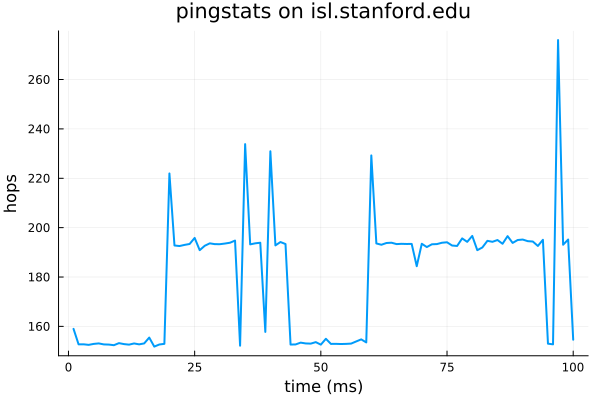

In [46]:
@df df plot(
    [:pingstats]
    , title = "pingstats on $server"
    , xlabel = "time (ms)"
    , ylabel = "hops"
    , label = :none
    , linewidth = 2
)

&#x1F516; **(&#x2173;)**  In Matlab, plot a histogram of the measurements {y1, . . . , yn} you made and in the same plot superimpose the graphs for the marginal densities $f (y|\hat{\theta}_{ML,i} (Y )), i \in \{G, R, E0, E1, E2, exp,SR \}$. Make this plot for y going from a value that is somewhat smaller than the $y_{min}$ you measured to a value that is somewhat bigger than the $y_{max}$ you measured. In Matlab, use the histogram command with the options ’Normalization’ and ’probability’, so that the histogram can be compared directly to the pdf of the distributions.

In [10]:
using StatsPlots

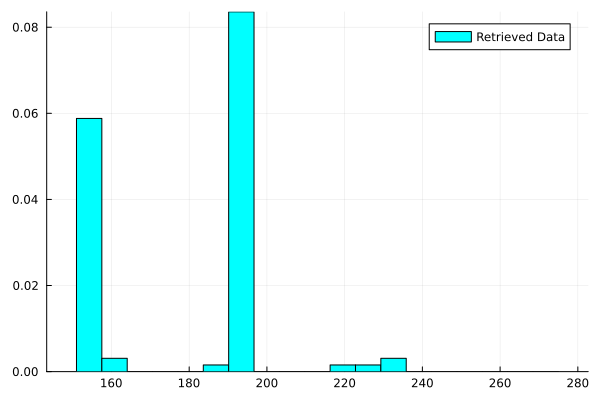

In [11]:
# Select the variable for which you want to plot the marginal density
variable_index = 1  # Index of the variable (1 for the first variable, 2 for the second)
selected_variable = stats[:, variable_index];
# Plot the marginal density using a histogram
b_range = range(trunc(Int, minimum(stats)), trunc(Int, maximum(stats)), length=20)
histogram(stats, label="Retrieved Data", bins=b_range, normalize=:pdf, color=:Cyan)

In [12]:
using Turing

In [13]:
@model function pmodel(xs) 
    # priors 
    σ² ~ InverseGamma(2 , 3)
    μ ~ Normal(0 , σ²)
    R ~ Rayleigh(4)
    E₁ ~ Erlang(1)
    E₂ ~ Erlang(2)
    exp ~ Exponential()

    # likelihood
    for i in eachindex(xs)
        xs[i] ~ Normal(μ , σ²)
    end
end

pmodel (generic function with 2 methods)

In [14]:
# Construct a model with our data
pingM = pmodel(stats);

In [15]:
chain = sample(
    pingM, 
    NUTS(), 
    N # Number of samples
)

┌ Info: Found initial step size
└   ϵ = 0.0001953125
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01


Chains MCMC chain (100×18×1 Array{Float64, 3}):

Iterations        = 51:1:150
Number of chains  = 1
Samples per chain = 100
Wall duration     = 11.36 seconds
Compute duration  = 11.36 seconds
parameters        = σ², μ, R, E₁, E₂, exp
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters       mean       std      mcse   ess_bulk   ess_tail      rhat    ⋯
      Symbol    Float64   Float64   Float64    Float64    Float64   Float64    ⋯

          σ²    29.8490    1.8669    0.1888    96.1352    52.2239    0.9965    ⋯
           μ   178.9393    2.6354    0.6922    14.2766    47.4880    1.0967    ⋯
           R     5.0185    2.1297    0.2353    78.4321    44.5810    0.9926    ⋯
          E₁     1.1732    1.2774    0.1368    70.7316    65.7763    0.9919    ⋯
          E₂     2.1381    1.5469    0.1670    39.2119 

In [16]:
# Show all the distributions that can be extracted from the chain
param_names = names(chain); @show param_names;

param_names = [:σ², :μ, :R, :E₁, :E₂, :exp, :lp, :n_steps, :is_accept, :acceptance_rate, :log_density, :hamiltonian_energy, :hamiltonian_energy_error, :max_hamiltonian_energy_error, :tree_depth, :numerical_error, :step_size, :nom_step_size]


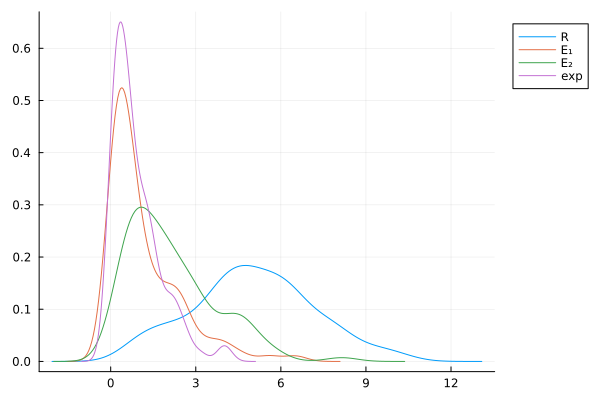

In [17]:
# Get parameter names from the chain
param_names =  [:R, :E₁, :E₂, :exp]

# Initialize an empty plot
p = plot(legend = :outertopright)

# Loop through each parameter and add a density plot to 'p'
for name in param_names
    # For each parameter, add a density plot to the existing plot
    plot!(p, chain[name], seriestype = :density, label = String(name))
end

# Display the combined plot
display(p)

&#x1F516; **(&#x2174;)**   Exploiting the Maximum Likelihood criterion to the fullest, we shall determine the best choice for the distribution of the roundtrip delays as the one that maximizes the likelihood:

$$ \hat{1}_ML = argmax_{\substack{ i \in \{ G,R,E0, E1, exp, SR\}}} f_i( Y | \hat{\theta}_{ML,i} (Y))$$


In Matlab, calculate which is the best distribution in your case. Is the result in agreement
with the graphs of the densities and the histogram you plotted?
Please state which host machine you used for ping and please provide also the Matlab code that you created to do your calculations and plots, in a way that makes it easy (unambiguous) for someone to replicate your results.

In [18]:
using Optim

In [19]:
mle = Optim.optimize(pingM, MLE());

In [20]:
mle.values

6-element Named Vector{Float64}
A   │ 
────┼─────────
σ²  │  23.9994
μ   │  179.704
R   │  7.12051
E₁  │ 0.247008
E₂  │  2.36951
exp │  1.26155

In [21]:
argmax = maximum(mle.values)

179.70368999998277

In [22]:
# Select the variable for which you want to plot the marginal density
variable_index = 1  # Index of the variable (1 for the first variable, 2 for the second)
selected_variable = stats[:, variable_index];
selected_variable1 = chain[:μ ][:, variable_index];

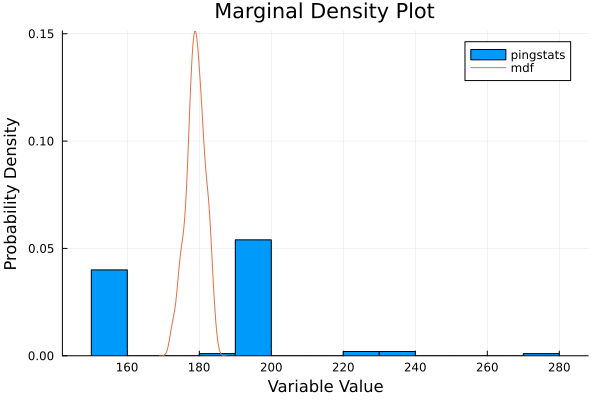

In [23]:
# Plot the marginal density using a histogram
histogram(selected_variable, bins=20, normalize=true
    , xlabel="Variable Value", ylabel="Probability Density"
    , title="Marginal Density Plot"
    , label = "pingstats"
)
# histogram!(chain[:R]; label="Posterior R")
density!(selected_variable1; bins=20, normalize=true
    , label = "mdf"
)

# &#x1F4DA; References
- [ ] [UTF-8 Number Forms](https://www.w3schools.com/charsets/ref_utf_number_forms.asp)